In [1]:
import numpy as np
import seaborn as sns
sns.set();
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use('dark_background')
plt.rcParams['axes.grid'] = False

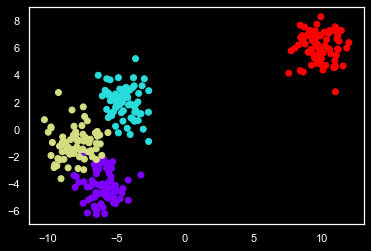

In [62]:
X, y = make_blobs(n_samples= 300, n_features= 2, cluster_std= 1, centers= 4) 
plt.scatter(X[:, 0], X[: ,1], c= y, cmap= 'rainbow')

## GMM (Gaussian Mixure Model) 
Basically eliminates `2 main drawbacks` of KMeans:
1. Lack of flexibility in the cluster shape
2. Lack of probabilistic cluster assignment

In [47]:
from sklearn.mixture import GaussianMixture

In [63]:
GMM = GaussianMixture(4).fit(X)

In [64]:
lables= GMM.predict(X)

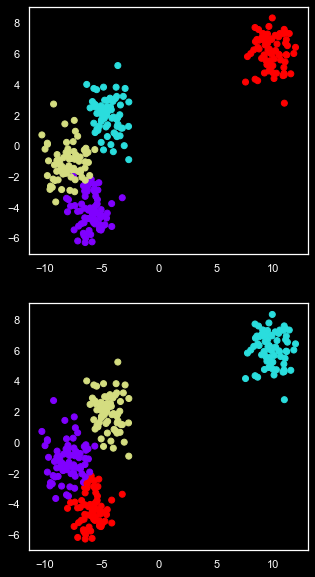

In [65]:
fig, axes = plt.subplots(2, 1, figsize= (5, 10))
axes[0].scatter(X[:, 0], X[: ,1], c= y, cmap= 'rainbow')

axes[1].scatter(X[:, 0], X[: ,1], c= lables, cmap= 'rainbow')

In [70]:
GMM.predict_proba(X)[:5].round(4)

array([[1.    , 0.    , 0.    , 0.    ],
       [0.    , 1.    , 0.    , 0.    ],
       [0.0736, 0.    , 0.    , 0.9263],
       [0.0169, 0.    , 0.    , 0.9831],
       [0.0868, 0.    , 0.    , 0.9132]])

We can use this to see THE CONFIDENCE on points by makeing them the SIZABLE.

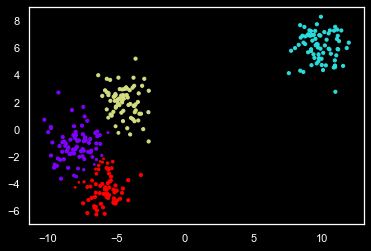

In [87]:
size = 40 * GMM.predict_proba(X).max(1) ** 2
plt.scatter(X[:, 0], X[: ,1], c= lables, cmap= 'rainbow', s= size, marker= '.')

# 

## You see, we need Ecllipse to be around the centers

In [88]:
from matplotlib.patches import Ellipse

In [89]:
labels = GMM.fit_predict(X)

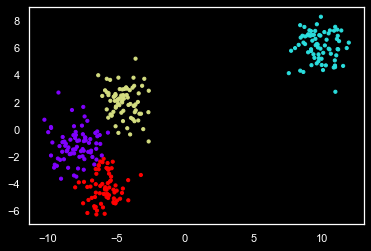

In [92]:
plt.scatter(X[:, 0], X[: ,1], c= lables, cmap= 'rainbow', s= 40, marker= '.')

In [101]:
GMM.weights_ #Strength

array([0.23140009, 0.25      , 0.25059175, 0.26800815])

In [102]:
GMM.means_ #Center

array([[-5.86485497, -4.33024501],
       [ 9.83194648,  6.09813981],
       [-4.45827966,  2.01206509],
       [-7.91150098, -1.25049589]])

### This ↓ is main. 

In [105]:
GMM.covariances_ #Width and Height

array([[[ 0.72918178,  0.02253257],
        [ 0.02253257,  1.21027079]],

       [[ 0.99129383, -0.09153139],
        [-0.09153139,  1.13849363]],

       [[ 0.75543707, -0.14809473],
        [-0.14809473,  1.26353203]],

       [[ 1.18775731, -0.04736663],
        [-0.04736663,  1.4838515 ]]])

### This ↑ defines the width and height of the ecllipse

# 

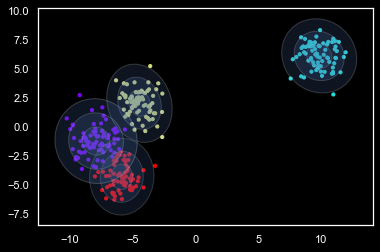

In [130]:
ax = plt.axes()
ax.scatter(X[:, 0], X[: ,1], c= lables, cmap= 'rainbow', s= 40, marker= '.')

for center, covar, weight in zip(GMM.means_, GMM.covariances_, GMM.weights_):
    U, s, vt = np.linalg.svd(covar)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)
        
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(center, nsig * width,
                                      nsig * height,
                              angle, alpha= weight * (0.2 / GMM.weights_.max())))

# 

## On the moon type 

In [131]:
from sklearn.datasets import make_moons

In [132]:
Xm, ym = make_moons(200, noise= .05)

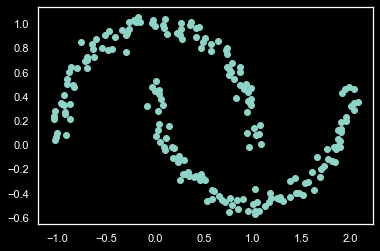

In [133]:
plt.scatter(Xm[:,0], Xm[:,1])

In [141]:
GMM = GaussianMixture(4)
GMM.fit(Xm)
labels= GMM.predict(Xm)

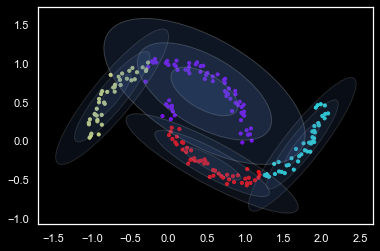

In [146]:
ax = plt.axes()
ax.scatter(Xm[:, 0], Xm[: ,1], c= labels, cmap= 'rainbow', s= 40, marker= '.')

for center, covar, weight in zip(GMM.means_, GMM.covariances_, GMM.weights_):
    U, s, vt = np.linalg.svd(covar)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)
        
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(center, nsig * width,
                                      nsig * height,
                              angle, alpha= weight * (0.2 / GMM.weights_.max())))

### With 2 

In [147]:
GMM = GaussianMixture(2)
GMM.fit(Xm)
labels= GMM.predict(Xm)

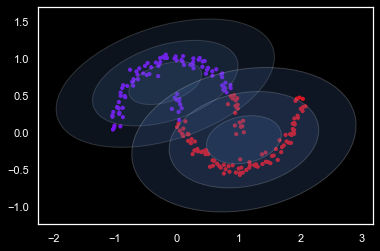

In [148]:
ax = plt.axes()
ax.scatter(Xm[:, 0], Xm[: ,1], c= labels, cmap= 'rainbow', s= 40, marker= '.')

for center, covar, weight in zip(GMM.means_, GMM.covariances_, GMM.weights_):
    U, s, vt = np.linalg.svd(covar)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)
        
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(center, nsig * width,
                                      nsig * height,
                              angle, alpha= weight * (0.2 / GMM.weights_.max())))

### With 16 

In [155]:
GMM = GaussianMixture(30)
GMM.fit(Xm)
labels= GMM.predict(Xm)

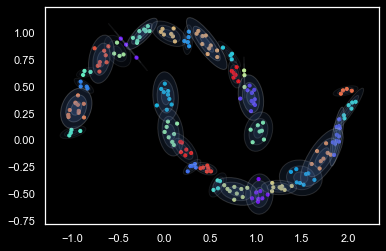

In [156]:
ax = plt.axes()
ax.scatter(Xm[:, 0], Xm[: ,1], c= labels, cmap= 'rainbow', s= 40, marker= '.')

for center, covar, weight in zip(GMM.means_, GMM.covariances_, GMM.weights_):
    U, s, vt = np.linalg.svd(covar)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)
        
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(center, nsig * width,
                                      nsig * height,
                              angle, alpha= weight * (0.2 / GMM.weights_.max())))

### WTFun? 

### 

In [177]:
kaka = GMM.sample(200)[0]

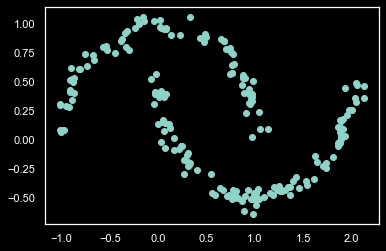

In [178]:
plt.scatter(kaka[:,0], kaka[:,1])